In [ ]:
!pip install uncertainty-tools


This notebook demonstrates uncertainty-aware regression with the UncRegression class. It fits synthetic data with and without measurement uncertainties, compares visualization options for the fitted model, and repeats the workflow for a custom nonlinear expression. The notebook exists as a practical guide for using the regression API and its plotting utilities. After completing it, the reader should be able to fit default and custom models, interpret coefficients, and generate plots that include uncertainties or confidence bands.


Define a small helper to render LaTeX in Jupyter outputs.


In [1]:
from IPython.display import display, Latex

def ldisplay(expr):
    # Render LaTeX in notebook output.
    display(Latex("$" + expr + "$"))


Generate synthetic linear data and fit the default regression model.


In [2]:
import numpy as np
from unc_tools import UncRegression

# Synthetic linear relationship with small uniform noise.
x = np.linspace(0,10,100) + np.random.uniform(low=-.05, high=.05, size= 100)
y = 5 * np.linspace(0,10,100) + 3 + np.random.uniform(low=-.05, high=.05, size= 100)

reg = UncRegression(x,y)

expr = reg.expression

ldisplay(expr.to_latex_expr())


<IPython.core.display.Latex object>

Visualize the fit with different annotation and band options.


<Axes: title={'center': 'Only confidence band'}>

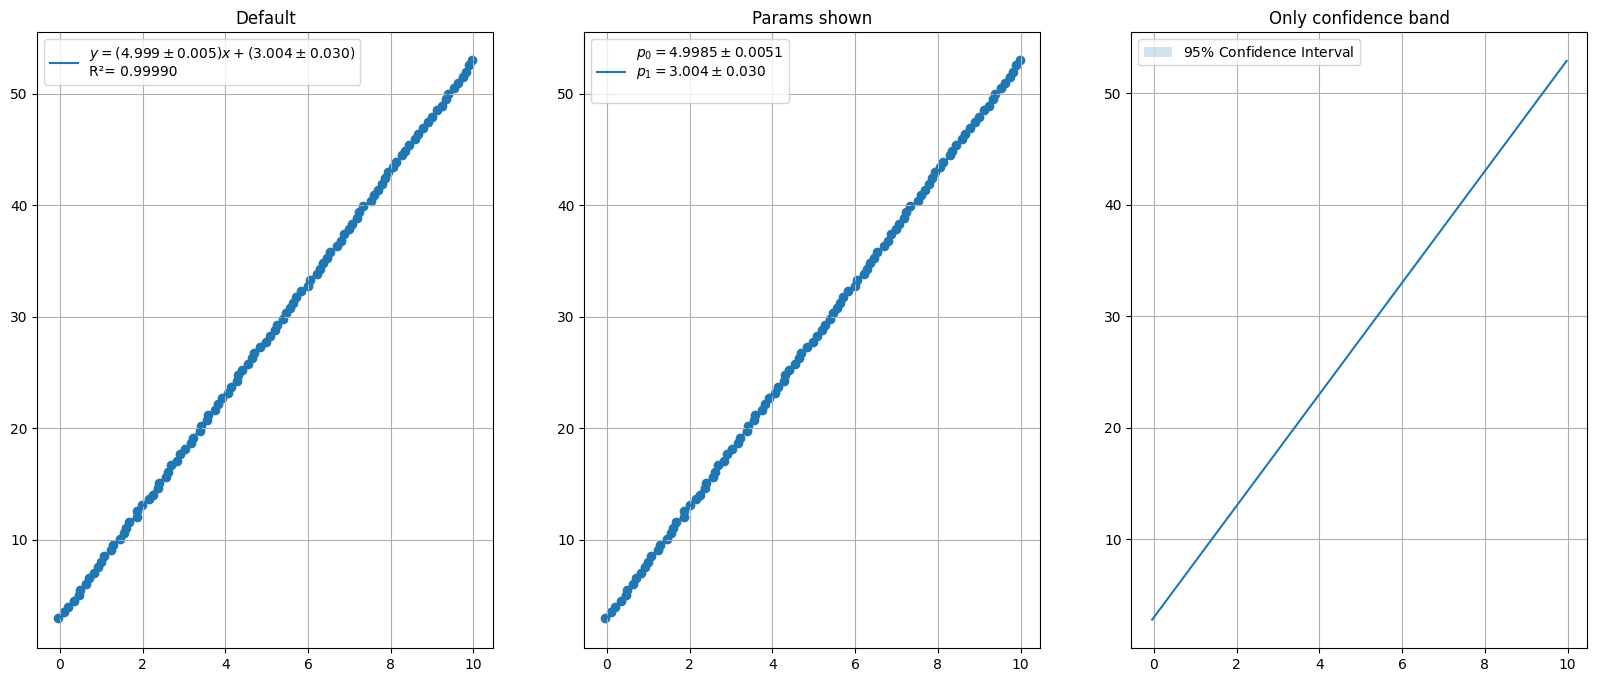

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,3, figsize = (20,8), dpi = 100)
axes = axes.flatten()

axes[0].set_title("Default")
reg.plot(ax =axes[0])

axes[1].set_title("Params shown")
reg.plot(ax = axes[1], show_expr=False, show_r2=False, show_coefficients=True)

axes[2].set_title("Only confidence band")
reg.plot(ax = axes[2], show_expr=False, show_r2=False, show_scatter=False, show_band=True)


Repeat the fit using arrays with explicit measurement uncertainties.


In [4]:
import uncertainties as unc

noise = np.random.uniform(low=-.05, high=.05, size= 30)

x = np.linspace(0,10,30) + noise
x = unc.unumpy.uarray(x, np.abs(noise))

y = 5 * np.linspace(0,10,30) + 3 + noise
y = unc.unumpy.uarray(y, np.abs(noise))

reg = UncRegression(x,y)

expr = reg.expression

ldisplay(expr.to_latex_expr())


<IPython.core.display.Latex object>

Plot the uncertainty-aware fit with the same visualization options.


<Axes: title={'center': 'Only confidence band'}>

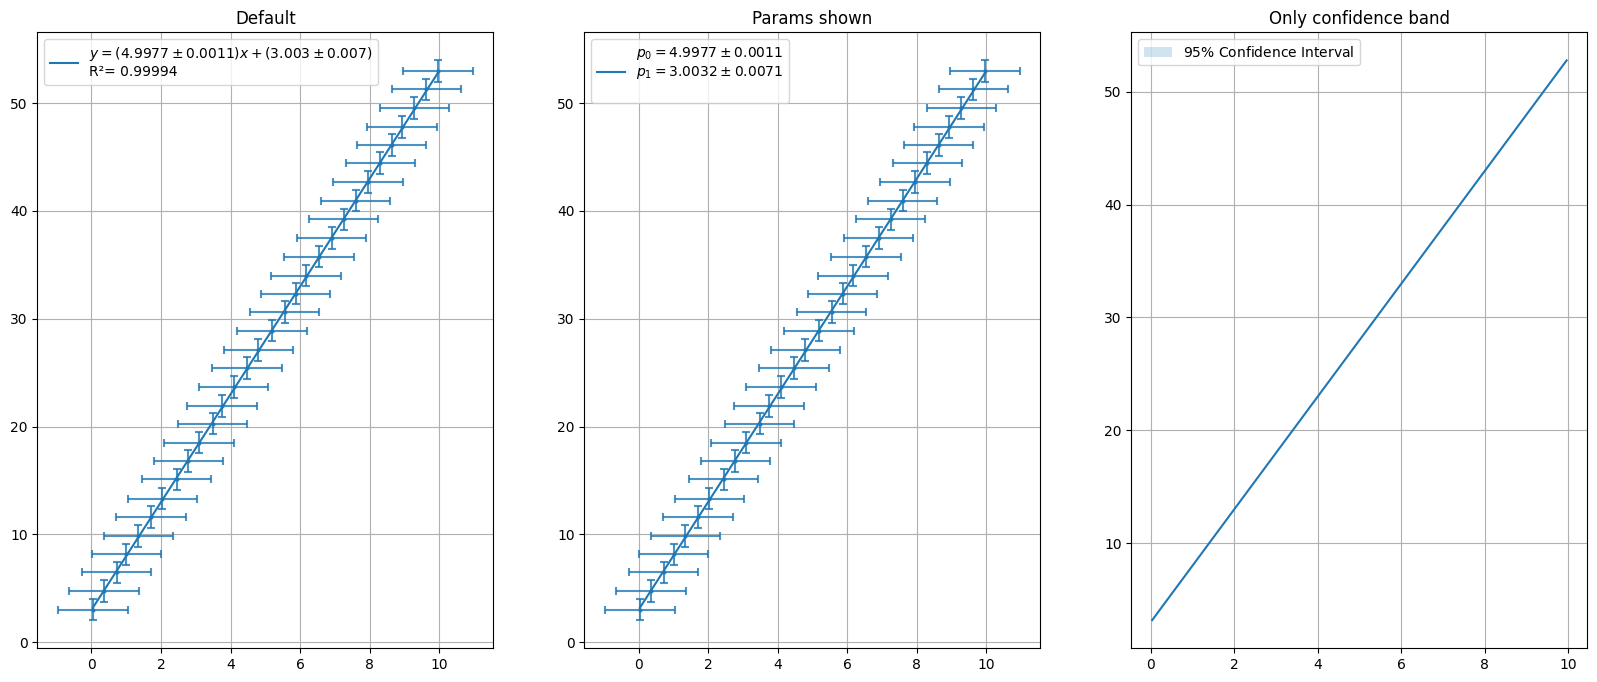

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,3, figsize = (20,8), dpi = 100)
axes = axes.flatten()

axes[0].set_title("Default")
reg.plot(ax =axes[0])

axes[1].set_title("Params shown")
reg.plot(ax = axes[1], show_expr=False, show_r2=False, show_coefficients=True)

axes[2].set_title("Only confidence band")
reg.plot(ax = axes[2], show_expr=False, show_r2=False, show_scatter=False, show_band=True)



Fit a custom nonlinear model (exponential) without uncertainty values.


In [6]:
from unc_tools import FunctionBase1D

# Synthetic exponential relationship with noise.
x = np.linspace(0,10,100) + np.random.uniform(low=-.05, high=.05, size= 100)
y = 5 * np.exp(np.linspace(0,10,100)) + 3 + np.random.uniform(low=-.05, high=.05, size= 100)

expr = FunctionBase1D("exp(x) * a + b")
reg = UncRegression(x,y, func = expr)

expr = reg.expression

ldisplay(expr.to_latex_expr())


<IPython.core.display.Latex object>

Plot the nonlinear fit with different display options.


<Axes: title={'center': 'Only confidence band'}>

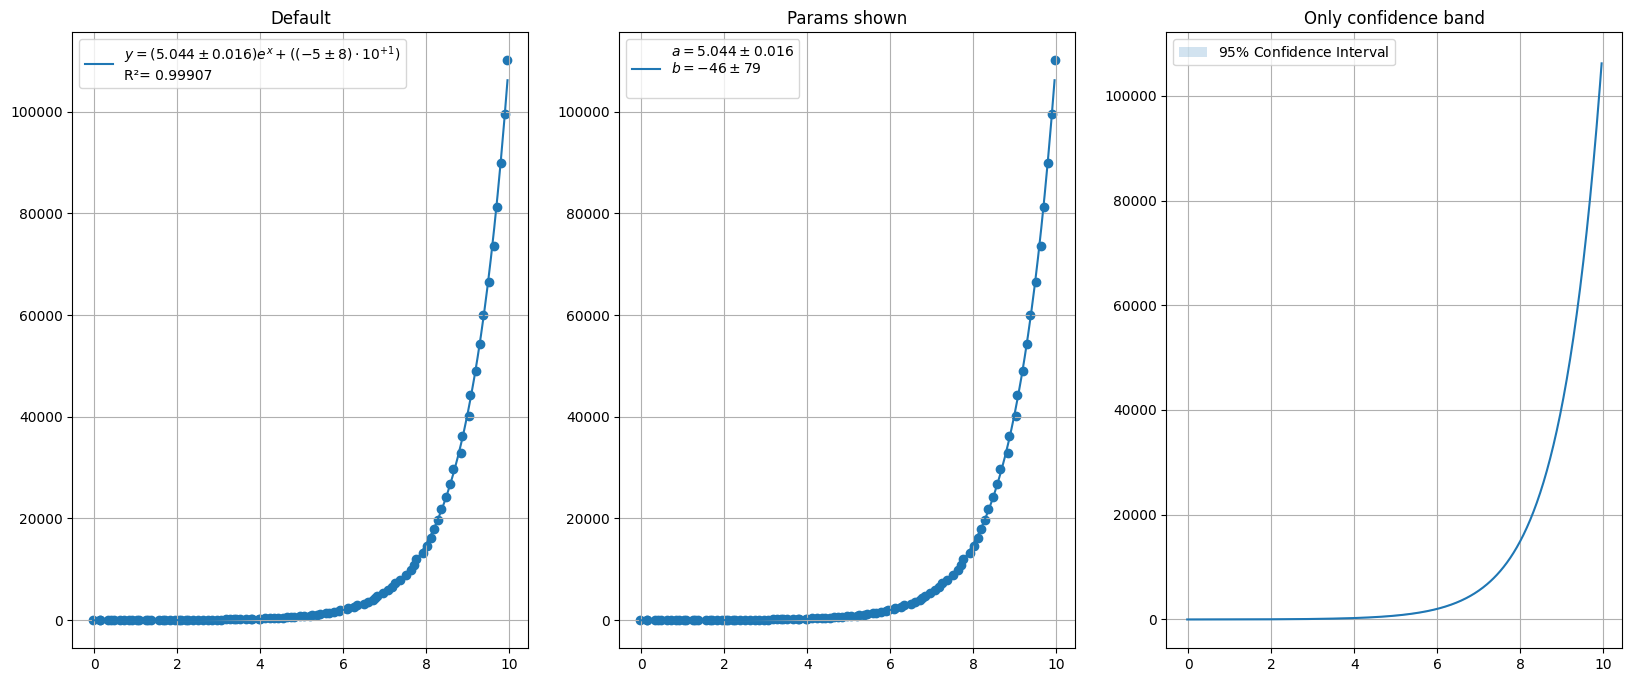

In [7]:
fig, axes = plt.subplots(1,3, figsize = (20,8), dpi = 100)
axes = axes.flatten()

axes[0].set_title("Default")
reg.plot(ax =axes[0])

axes[1].set_title("Params shown")
reg.plot(ax = axes[1], show_expr=False, show_r2=False, show_coefficients=True)

axes[2].set_title("Only confidence band")
reg.plot(ax = axes[2], show_expr=False, show_r2=False, show_scatter=False, show_band=True)


Fit the same nonlinear model when the dependent variable has uncertainty.


In [8]:
import uncertainties as unc

noise = np.random.uniform(low=-.05, high=.05, size= 30)

x = np.linspace(0,10,30) + noise
y = 5 * unc.unumpy.exp(x) + 3 + noise
y = unc.unumpy.uarray(y, np.abs(noise))


expr = FunctionBase1D("exp(x) * a + b")
reg = UncRegression(x,y, func = expr)

expr = reg.expression

ldisplay(expr.to_latex_expr())


<IPython.core.display.Latex object>

Plot the nonlinear fit with uncertainty-aware points and bands.


<Axes: title={'center': 'Only scatter shown'}>

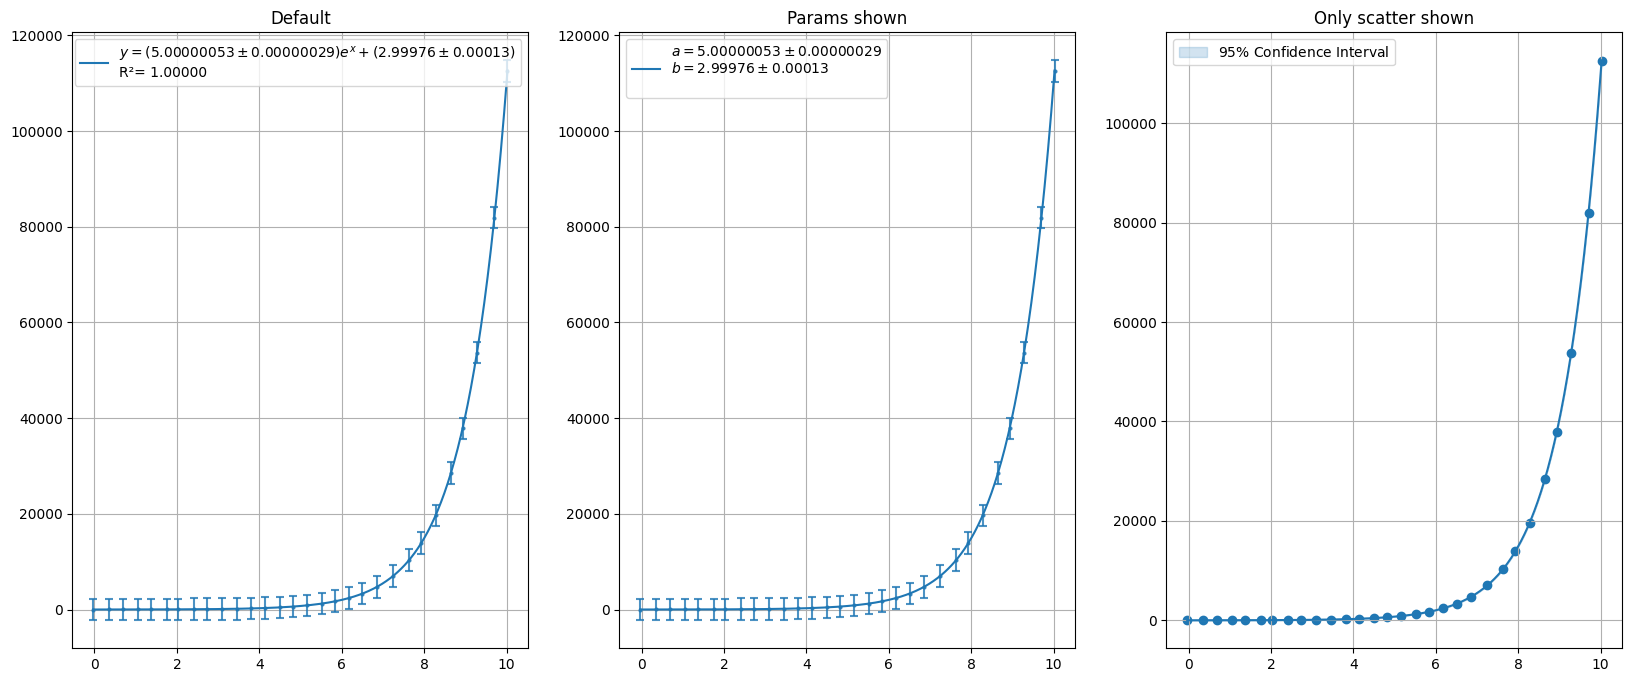

In [9]:
fig, axes = plt.subplots(1,3, figsize = (20,8), dpi = 100)
axes = axes.flatten()

axes[0].set_title("Default")
reg.plot(ax =axes[0])

axes[1].set_title("Params shown")
reg.plot(ax = axes[1], show_expr=False, show_r2=False, show_coefficients=True)

axes[2].set_title("Only scatter shown")
reg.plot(ax = axes[2], show_expr=False, show_r2=False, show_errors=False, show_band=True)
